In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split;
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_train=pd.read_csv("/content/gdrive/MyDrive/Research work/WEO Growth/data/train x.csv")
df_test=pd.read_csv("/content/gdrive/MyDrive/Research work/WEO Growth/data/test.csv")


# New Section

In [ ]:
df_train.isnull().sum()
df_test.isnull().sum()

Subject Descriptor                                 0
Gross domestic product                             0
Investment                                         0
Inflation                                          0
Trade volume of goods and services                 0
Crude Oil (petroleum)                              0
Natural Gas                                        0
Wheat                                              0
Soybeans                                           0
CWI includes Coarse and Fine Wool Price Indices    0
dtype: int64

In [ ]:
X_1=df_train.drop('Gross domestic product',axis=1)
X=X_1.drop('Subject Descriptor',axis=1).values
y=df_train['Gross domestic product'].values
y

array([ 3.805,  3.426,  4.013,  2.577,  2.685,  2.331,  2.041,  3.23 ,
        3.359,  3.926,  4.013,  2.577,  3.547,  4.799,  2.446,  2.902,
        4.256,  5.422,  4.857,  5.421,  5.559, -0.086,  5.432,  4.285,
        3.572,  3.415,  3.52 ,  3.424,  3.251,  3.747,  2.865,  6.108])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1 ,random_state=1)
y_test

array([3.424, 2.577, 5.432, 4.857])

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=2, input_dim=8, kernel_initializer='uniform', activation='tanh'))
 # The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='uniform'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='SGD')

# Fitting the ANN to the Training set
history= model.fit(X_train, y_train ,batch_size = 32, epochs = 45, verbose=2,validation_split=0.2)
# chage file not code for cv to test
# for test epoch 45  mse 0.010933
# for CV epoch 190  mse 0.8837


Epoch 1/45
1/1 - 1s - loss: 15.5594 - val_loss: 9.4077 - 833ms/epoch - 833ms/step
Epoch 2/45
1/1 - 0s - loss: 14.9259 - val_loss: 8.8511 - 66ms/epoch - 66ms/step
Epoch 3/45
1/1 - 0s - loss: 14.2343 - val_loss: 8.2083 - 78ms/epoch - 78ms/step
Epoch 4/45
1/1 - 0s - loss: 13.4376 - val_loss: 7.5171 - 64ms/epoch - 64ms/step
Epoch 5/45
1/1 - 0s - loss: 12.5825 - val_loss: 6.8228 - 47ms/epoch - 47ms/step
Epoch 6/45
1/1 - 0s - loss: 11.7135 - val_loss: 6.1275 - 44ms/epoch - 44ms/step
Epoch 7/45
1/1 - 0s - loss: 10.8317 - val_loss: 5.4234 - 43ms/epoch - 43ms/step
Epoch 8/45
1/1 - 0s - loss: 9.9376 - val_loss: 4.7350 - 48ms/epoch - 48ms/step
Epoch 9/45
1/1 - 0s - loss: 9.0641 - val_loss: 4.0997 - 62ms/epoch - 62ms/step
Epoch 10/45
1/1 - 0s - loss: 8.2495 - val_loss: 3.5344 - 52ms/epoch - 52ms/step
Epoch 11/45
1/1 - 0s - loss: 7.5111 - val_loss: 3.0396 - 49ms/epoch - 49ms/step
Epoch 12/45
1/1 - 0s - loss: 6.8503 - val_loss: 2.6098 - 46ms/epoch - 46ms/step
Epoch 13/45
1/1 - 0s - loss: 6.2622 - va

In [ ]:
X_1=df_test.drop('Gross domestic product',axis=1)
# X_test=X_1.drop('Subject Descriptor',axis=1).valuesco
y_test=df_test['Gross domestic product'].values


In [ ]:
Predictions=model.predict(X_test)
Predictions



1/1 [==============================] - 0s 81ms/step


array([[3.4550142],
       [3.4189715],
       [3.4549327],
       [3.4495034]], dtype=float32)

In [ ]:
import numpy as np

def mse(y_test, Predictions):
    y_test, Predictions = np.array(y_test), np.array(Predictions)
    return np.square(np.subtract(y_test,Predictions)).mean()

In [ ]:
mse(y_test, Predictions)

0.011006638676056484

dict_keys(['loss', 'val_loss'])


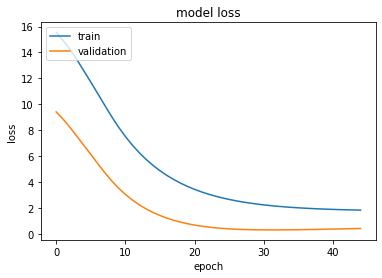

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()